In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Load csv file
df = pd.read_csv('result/H21s.csv')


In [33]:
# Data output
df.head()

,No.,正誤,分野名,大分類,中分類,出典,学習日
0,1,○,テクノロジ系,基礎理論,基礎理論,平成21年春期 問1,2021/8/14
1,2,○,テクノロジ系,基礎理論,基礎理論,平成21年春期 問2,2021/8/14
2,3,×,テクノロジ系,基礎理論,基礎理論,平成21年春期 問3,2021/8/14
3,4,×,テクノロジ系,基礎理論,基礎理論,平成21年春期 問4,2021/8/14
4,5,×,テクノロジ系,基礎理論,アルゴリズムとプログラミング,平成21年春期 問5,2021/8/14


In [34]:
# iat = iat[rows(num), columns(num)]
# Held times acquired
df_title = df.iat[1,5][:7]
df_title

'平成21年春期'

In [35]:
# Sorting a table(.loc[])
df = df.loc[:,['No.','分野名', '大分類', '中分類', '正誤', '学習日', '出典']]
df

,No.,分野名,大分類,中分類,正誤,学習日,出典
0,1,テクノロジ系,基礎理論,基礎理論,○,2021/8/14,平成21年春期 問1
1,2,テクノロジ系,基礎理論,基礎理論,○,2021/8/14,平成21年春期 問2
2,3,テクノロジ系,基礎理論,基礎理論,×,2021/8/14,平成21年春期 問3
3,4,テクノロジ系,基礎理論,基礎理論,×,2021/8/14,平成21年春期 問4
4,5,テクノロジ系,基礎理論,アルゴリズムとプログラミング,×,2021/8/14,平成21年春期 問5
...,...,...,...,...,...,...,...
76,77,ストラテジ系,企業と法務,企業活動,×,2021/8/14,平成21年春期 問77
77,78,ストラテジ系,企業と法務,法務,×,2021/8/14,平成21年春期 問78
78,79,ストラテジ系,企業と法務,法務,○,2021/8/14,平成21年春期 問79
79,80,ストラテジ系,企業と法務,法務,○,2021/8/14,平成21年春期 問80


In [36]:
# Splitting a table(r1&r2)
r1 = df[['No.', '正誤']]
r2 = df[['分野名', '大分類', '中分類']]
print(r1)
print(r2)

   No.   正誤
0    1    ○
1    2    ○
2    3    ×
3    4    ×
4    5    ×
..  ..  ...
76  77    ×
77  78    ×
78  79    ○
79  80    ○
80      NaN

[81 rows x 2 columns]
       分野名    大分類             中分類
0   テクノロジ系   基礎理論            基礎理論
1   テクノロジ系   基礎理論            基礎理論
2   テクノロジ系   基礎理論            基礎理論
3   テクノロジ系   基礎理論            基礎理論
4   テクノロジ系   基礎理論  アルゴリズムとプログラミング
..     ...    ...             ...
76  ストラテジ系  企業と法務            企業活動
77  ストラテジ系  企業と法務              法務
78  ストラテジ系  企業と法務              法務
79  ストラテジ系  企業と法務              法務
80     NaN    NaN             NaN

[81 rows x 3 columns]


In [37]:
# Convert symbols to characters
def alter_label(value):
    if value == '○':
        return '正'
    return '誤'

In [38]:
# Convert the table(r1)
r1['正誤'] = r1['正誤'].map(alter_label)
r1

/Users/tagushun11/.pyenv/versions/3.7.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,No.,正誤
0,1,正
1,2,正
2,3,誤
3,4,誤
4,5,誤
...,...,...
76,77,誤
77,78,誤
78,79,正
79,80,正


In [39]:
# Calculate the number of correct answers
grouped_1 = r1.value_counts('正誤')
grouped_1

正誤
誤    44
正    37
dtype: int64

In [40]:
# Calculate the number of pieces for each category
grouped_2 = df['大分類'].value_counts()
grouped_2

技術要素            18
コンピュータシステム      17
基礎理論             8
システム戦略           7
開発技術             7
経営戦略             7
企業と法務            6
サービスマネジメント       6
プロジェクトマネジメント     4
Name: 大分類, dtype: int64

In [41]:
grouped_field = df.groupby('分野名')
grouped_field.groups

{'ストラテジ系': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'テクノロジ系': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'マネジメント系': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}

In [42]:
grouped_class1 = df.groupby('大分類')
grouped_class1.groups

{'コンピュータシステム': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'サービスマネジメント': [54, 55, 56, 57, 58, 59], 'システム戦略': [60, 61, 63, 64, 65, 66, 71], 'プロジェクトマネジメント': [50, 51, 52, 53], '企業と法務': [62, 75, 76, 77, 78, 79], '基礎理論': [0, 1, 2, 3, 4, 5, 6, 7], '技術要素': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42], '経営戦略': [67, 68, 69, 70, 72, 73, 74], '開発技術': [43, 44, 45, 46, 47, 48, 49]}

In [43]:
grouped_class2 = df.groupby('中分類')
grouped_class2.groups

{'アルゴリズムとプログラミング': [4, 5, 6, 7], 'コンピュータ構成要素': [8, 10, 11, 13], 'サービスマネジメント': [54, 55, 56], 'システム企画': [64, 65, 66], 'システム戦略': [60, 61, 63, 71], 'システム構成要素': [12, 14, 15, 16], 'システム監査': [57, 58, 59], 'システム開発技術': [43, 45, 46, 47], 'セキュリティ': [39, 40, 41, 42], 'ソフトウェア': [17, 18, 19, 20, 21, 22], 'ソフトウェア開発管理技術': [44, 48, 49], 'データベース': [28, 30, 31, 32, 33, 34], 'ネットワーク': [35, 36, 37, 38], 'ハードウェア': [9, 23, 24], 'ヒューマンインタフェース': [25, 26, 27], 'ビジネスインダストリ': [72, 73], 'プロジェクトマネジメント': [50, 51, 52, 53], 'マルチメディア': [29], '企業活動': [62, 75, 76], '基礎理論': [0, 1, 2, 3], '技術戦略マネジメント': [70], '法務': [77, 78, 79], '経営戦略マネジメント': [67, 68, 69, 74]}

In [44]:
multi_df = df.set_index(['大分類', '中分類'])
multi_df

No.     分野名   正誤        学習日           出典
大分類   中分類                                                    
基礎理論  基礎理論             1  テクノロジ系    ○  2021/8/14   平成21年春期 問1
      基礎理論             2  テクノロジ系    ○  2021/8/14   平成21年春期 問2
      基礎理論             3  テクノロジ系    ×  2021/8/14   平成21年春期 問3
      基礎理論             4  テクノロジ系    ×  2021/8/14   平成21年春期 問4
      アルゴリズムとプログラミング   5  テクノロジ系    ×  2021/8/14   平成21年春期 問5
...                   ..     ...  ...        ...          ...
企業と法務 企業活動            77  ストラテジ系    ×  2021/8/14  平成21年春期 問77
      法務              78  ストラテジ系    ×  2021/8/14  平成21年春期 問78
      法務              79  ストラテジ系    ○  2021/8/14  平成21年春期 問79
      法務              80  ストラテジ系    ○  2021/8/14  平成21年春期 問80
NaN   NaN                    NaN  NaN        NaN          NaN

[81 rows x 5 columns]

In [45]:
bunya = df.groupby('分野名')
bunya.groups

{'ストラテジ系': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'テクノロジ系': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'マネジメント系': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]}

In [46]:
# Counting correct answers
d = df['正誤'].value_counts().to_dict()
d['○']

37

In [47]:
# Calculate the percentages of correct answers
d_per = d['○'] / 80
d_per

0.4625

In [48]:
csv_files = glob.glob('result/*.csv')
csv_files

['result/H22s.csv',
 'result/H23a.csv',
 'result/H23special.csv',
 'result/H21s.csv',
 'result/H21a.csv']

In [49]:
for a in csv_files:
    print(a)

result/H22s.csv
result/H23a.csv
result/H23special.csv
result/H21s.csv
result/H21a.csv


In [50]:
data_list = []

for file in csv_files:
    data = pd.read_csv(file)
    data_list.append(data)

data_list

[   No.   正誤     分野名    大分類             中分類           出典        学習日
 0    1    ×  テクノロジ系   基礎理論            基礎理論   平成22年春期 問1  2021/8/31
 1    2    ○  テクノロジ系   基礎理論            基礎理論   平成22年春期 問2  2021/8/31
 2    3    ×  テクノロジ系   基礎理論            基礎理論   平成22年春期 問3  2021/8/31
 3    4    ○  テクノロジ系   基礎理論            基礎理論   平成22年春期 問4  2021/8/31
 4    5    ×  テクノロジ系   基礎理論  アルゴリズムとプログラミング   平成22年春期 問5  2021/8/31
 ..  ..  ...     ...    ...             ...          ...        ...
 76  77    ×  ストラテジ系  企業と法務            企業活動  平成22年春期 問77  2021/8/31
 77  78    ×  ストラテジ系  企業と法務              法務  平成22年春期 問78  2021/8/31
 78  79    ×  ストラテジ系  企業と法務              法務  平成22年春期 問79  2021/8/31
 79  80    ×  ストラテジ系  企業と法務              法務  平成22年春期 問80  2021/8/31
 80      NaN     NaN    NaN             NaN          NaN        NaN
 
 [81 rows x 7 columns],
    No.   正誤     分野名         大分類         中分類           出典       学習日
 0    1    ○  ストラテジ系        経営戦略  ビジネスインダストリ  平成23年秋期 問74  2021/9/3
 1    2    ○  テクノロジ系  

In [51]:
df = pd.concat(data_list, axis=0, sort=True)
df

,No.,中分類,出典,分野名,大分類,学習日,正誤
0,1,基礎理論,平成22年春期 問1,テクノロジ系,基礎理論,2021/8/31,×
1,2,基礎理論,平成22年春期 問2,テクノロジ系,基礎理論,2021/8/31,○
2,3,基礎理論,平成22年春期 問3,テクノロジ系,基礎理論,2021/8/31,×
3,4,基礎理論,平成22年春期 問4,テクノロジ系,基礎理論,2021/8/31,○
4,5,アルゴリズムとプログラミング,平成22年春期 問5,テクノロジ系,基礎理論,2021/8/31,×
...,...,...,...,...,...,...,...
76,77,企業活動,平成21年秋期 問77,ストラテジ系,企業と法務,2021/8/27,○
77,78,法務,平成21年秋期 問78,ストラテジ系,企業と法務,2021/8/27,×
78,79,法務,平成21年秋期 問79,ストラテジ系,企業と法務,2021/8/27,○
79,80,法務,平成21年秋期 問80,ストラテジ系,企業と法務,2021/8/27,×


In [52]:
df.to_csv("total_file.csv", index=False)

In [53]:
df1 = pd.read_csv("total_file.csv")
df1

,No.,中分類,出典,分野名,大分類,学習日,正誤
0,1,基礎理論,平成22年春期 問1,テクノロジ系,基礎理論,2021/8/31,×
1,2,基礎理論,平成22年春期 問2,テクノロジ系,基礎理論,2021/8/31,○
2,3,基礎理論,平成22年春期 問3,テクノロジ系,基礎理論,2021/8/31,×
3,4,基礎理論,平成22年春期 問4,テクノロジ系,基礎理論,2021/8/31,○
4,5,アルゴリズムとプログラミング,平成22年春期 問5,テクノロジ系,基礎理論,2021/8/31,×
...,...,...,...,...,...,...,...
400,77,企業活動,平成21年秋期 問77,ストラテジ系,企業と法務,2021/8/27,○
401,78,法務,平成21年秋期 問78,ストラテジ系,企業と法務,2021/8/27,×
402,79,法務,平成21年秋期 問79,ストラテジ系,企業と法務,2021/8/27,○
403,80,法務,平成21年秋期 問80,ストラテジ系,企業と法務,2021/8/27,×


In [54]:
df1.index = df1.index + 1
df1

,No.,中分類,出典,分野名,大分類,学習日,正誤
1,1,基礎理論,平成22年春期 問1,テクノロジ系,基礎理論,2021/8/31,×
2,2,基礎理論,平成22年春期 問2,テクノロジ系,基礎理論,2021/8/31,○
3,3,基礎理論,平成22年春期 問3,テクノロジ系,基礎理論,2021/8/31,×
4,4,基礎理論,平成22年春期 問4,テクノロジ系,基礎理論,2021/8/31,○
5,5,アルゴリズムとプログラミング,平成22年春期 問5,テクノロジ系,基礎理論,2021/8/31,×
...,...,...,...,...,...,...,...
401,77,企業活動,平成21年秋期 問77,ストラテジ系,企業と法務,2021/8/27,○
402,78,法務,平成21年秋期 問78,ストラテジ系,企業と法務,2021/8/27,×
403,79,法務,平成21年秋期 問79,ストラテジ系,企業と法務,2021/8/27,○
404,80,法務,平成21年秋期 問80,ストラテジ系,企業と法務,2021/8/27,×


In [73]:
df_total = df[['中分類','正誤']]
df_total = df_total.rename(columns={'正誤': '正答率'})
df_total = df_total.replace(['○','×'], [1,0])
df_total = df_total.groupby('中分類').mean()
pd.options.display.float_format ='{:.0%}'.format
df_total = df_total.sort_values('正答率', ascending=False)
df_total

,正答率
中分類,
システム企画,69%
マルチメディア,67%
システム構成要素,62%
システム戦略,61%
セキュリティ,60%
ソフトウェア開発管理技術,60%
サービスマネジメント,59%
プロジェクトマネジメント,58%
企業活動,58%


In [56]:
plt.rcParams['font.family'] = 'Hiragino sans GB'

<AxesSubplot:ylabel='中分類'>

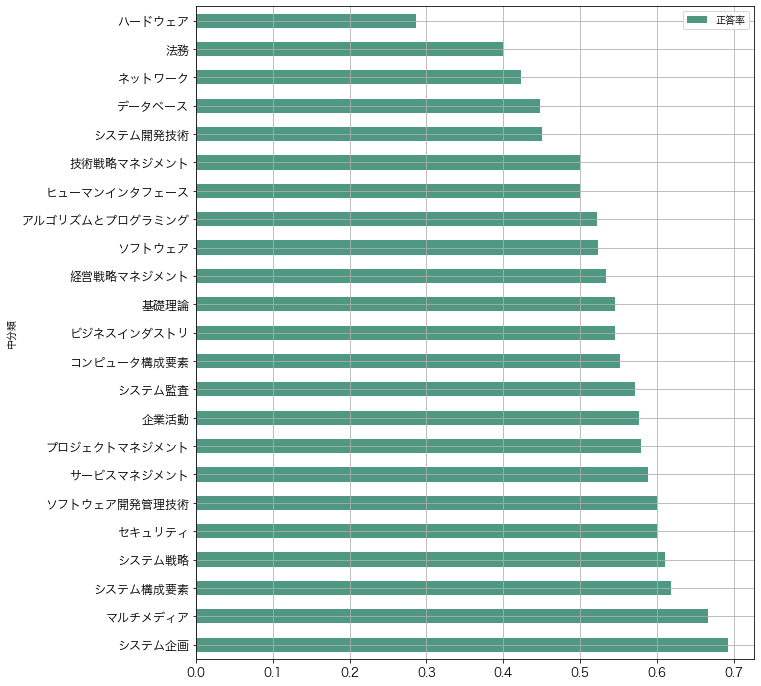

In [74]:
df_total.plot(kind='barh', rot=0, figsize=(10,12), color=['#4f9982','#8b5f00'], grid=True, fontsize=12)

In [58]:
df1_grouped = df1.groupby('中分類').count()['正誤'].reset_index()
df1_grouped = df1_grouped.rename(columns={'正誤': '出題数'})
df1_grouped.index = df1_grouped.index + 1
df1_grouped

,中分類,出題数
1,アルゴリズムとプログラミング,23
2,コンピュータ構成要素,29
3,サービスマネジメント,17
4,システム企画,13
5,システム戦略,18
6,システム構成要素,21
7,システム監査,14
8,システム開発技術,20
9,セキュリティ,20
10,ソフトウェア,21


In [59]:
df1_1 = df1[df1['中分類'] == 'アルゴリズムとプログラミング']
df1_1 = df1_1.replace(['○', '×'], [1, 0])
df1_1

,No.,中分類,出典,分野名,大分類,学習日,正誤
5,5,アルゴリズムとプログラミング,平成22年春期 問5,テクノロジ系,基礎理論,2021/8/31,0
6,6,アルゴリズムとプログラミング,平成22年春期 問6,テクノロジ系,基礎理論,2021/8/31,0
7,7,アルゴリズムとプログラミング,平成22年春期 問7,テクノロジ系,基礎理論,2021/8/31,1
8,8,アルゴリズムとプログラミング,平成22年春期 問8,テクノロジ系,基礎理論,2021/8/31,0
112,31,アルゴリズムとプログラミング,平成23年秋期 問8,テクノロジ系,基礎理論,2021/9/3,1
114,33,アルゴリズムとプログラミング,平成23年秋期 問7,テクノロジ系,基礎理論,2021/9/3,1
116,35,アルゴリズムとプログラミング,平成23年秋期 問49,テクノロジ系,基礎理論,2021/9/3,0
125,44,アルゴリズムとプログラミング,平成23年秋期 問27,テクノロジ系,基礎理論,2021/9/3,1
135,54,アルゴリズムとプログラミング,平成23年秋期 問5,テクノロジ系,基礎理論,2021/9/3,1
139,58,アルゴリズムとプログラミング,平成23年秋期 問6,テクノロジ系,基礎理論,2021/9/3,1


In [60]:
count_field = len(df1_1)
count_true = len(df1_1[df1_1['正誤'] == '○'])
calculation_true = count_true / count_field
calculation_true

0.0